# Analysis of CAV Dataset
--------------

This is an analysis of the CAV dataset.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from extra.cramers import cramers_corrected_stat

In [16]:
# load data
dir_file_data = "../00-Data/cav_policies.csv"
cav_data = pd.read_csv(dir_file_data)
print(cav_data.info())
cav_data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239580 entries, 0 to 239579
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   driving_task_type               239580 non-null  object 
 1   control                         239580 non-null  object 
 2   monitoring                      239580 non-null  object 
 3   fallback                        239580 non-null  object 
 4   weather                         239580 non-null  int64  
 5   visibility                      239580 non-null  int64  
 6   traffic_congestion              239580 non-null  int64  
 7   environmental_weighted_average  239580 non-null  float64
 8   driving_task_loa                239580 non-null  int64  
 9   vehicle_loa                     239580 non-null  int64  
 10  region_loa                      239580 non-null  int64  
 11  result                          239580 non-null  object 
dtypes: float64(1), i

,driving_task_type,control,monitoring,fallback,weather,visibility,traffic_congestion,environmental_weighted_average,driving_task_loa,vehicle_loa,region_loa,result
0,adaptive speed control,human and system,human,human,0,0,0,0.0,1,3,4,approved
1,high speed cruising,human,human,human,0,0,0,0.0,0,3,4,approved
2,parking,system,human,human,0,0,0,0.0,2,3,4,approved
3,performing turn,system,system,human,0,0,0,0.0,3,3,4,approved
4,residential driving,system,system,system,0,0,0,0.0,4,3,4,rejected
5,adaptive speed control,human and system,human,human,0,1,0,0.5,1,3,4,approved
6,high speed cruising,human,human,human,0,1,0,0.5,0,3,4,approved
7,parking,system,human,human,0,1,0,0.5,2,3,4,approved
8,performing turn,system,system,human,0,1,0,0.5,3,3,4,approved
9,residential driving,system,system,system,0,1,0,0.5,4,3,4,rejected


In [19]:
cav_data.tail(50)

,driving_task_type,control,monitoring,fallback,weather,visibility,traffic_congestion,environmental_weighted_average,driving_task_loa,vehicle_loa,region_loa,result
239530,adaptive speed control,human and system,human,human,10,1,10,5.5,1,1,2,approved
239531,high speed cruising,human,human,human,10,1,10,5.5,0,1,2,approved
239532,parking,system,human,human,10,1,10,5.5,2,1,2,rejected
239533,performing turn,system,system,human,10,1,10,5.5,3,1,2,rejected
239534,residential driving,system,system,system,10,1,10,5.5,4,1,2,rejected
239535,adaptive speed control,human and system,human,human,10,2,10,6.0,1,1,2,approved
239536,high speed cruising,human,human,human,10,2,10,6.0,0,1,2,approved
239537,parking,system,human,human,10,2,10,6.0,2,1,2,rejected
239538,performing turn,system,system,human,10,2,10,6.0,3,1,2,rejected
239539,residential driving,system,system,system,10,2,10,6.0,4,1,2,rejected


In [4]:
cav_data = cav_data.replace('human', 2)
cav_data = cav_data.replace('system', 1)
cav_data = cav_data.replace('human and system', 0)
cav_data = cav_data.replace('adaptive speed control', 1)
cav_data = cav_data.replace('high speed cruising', 2)
cav_data = cav_data.replace('parking', 3)
cav_data = cav_data.replace('performing turn', 4)
cav_data = cav_data.replace('residential driving', 5)
cav_data = cav_data.replace('approved', 0)
cav_data = cav_data.replace('rejected', 1)
cav_data

,driving_task_type,control,monitoring,fallback,weather,visibility,traffic_congestion,environmental_weighted_average,driving_task_loa,vehicle_loa,region_loa,result
0,1,0,2,2,0,0,0,0.0,1,3,4,0
1,2,2,2,2,0,0,0,0.0,0,3,4,0
2,3,1,2,2,0,0,0,0.0,2,3,4,0
3,4,1,1,2,0,0,0,0.0,3,3,4,0
4,5,1,1,1,0,0,0,0.0,4,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239575,1,0,2,2,10,10,10,10.0,5,1,2,1
239576,2,2,2,2,10,10,10,10.0,0,1,2,0
239577,3,1,2,2,10,10,10,10.0,5,1,2,1
239578,4,1,1,2,10,10,10,10.0,5,1,2,1


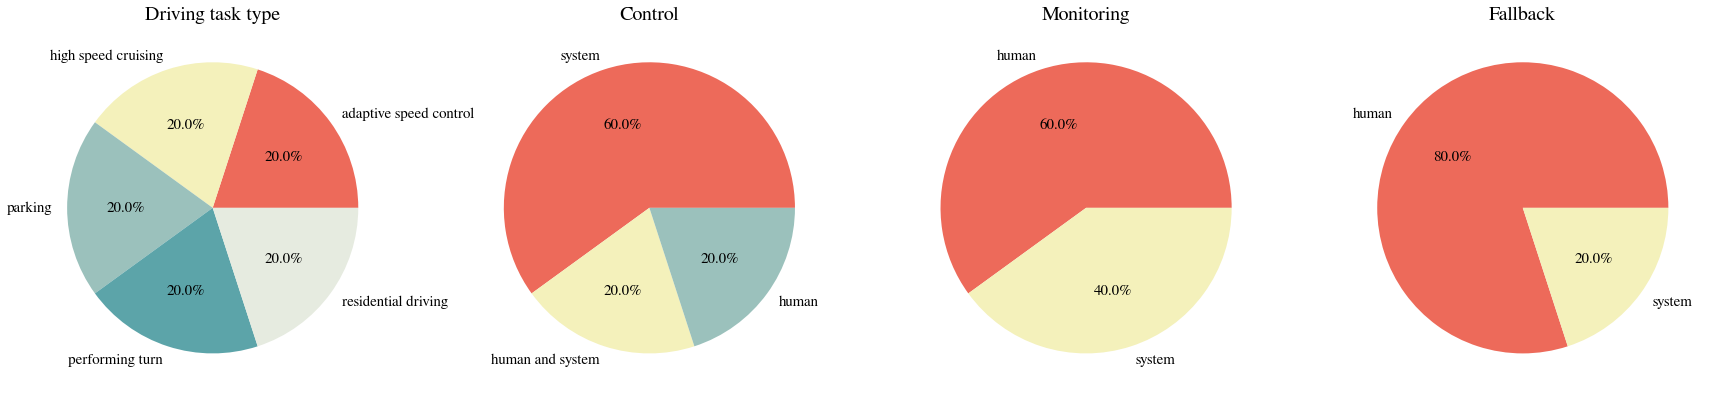

In [14]:
fontdict_title = {'fontsize': 20, 'fontname': 'FreeSerif'}
fontdict_labels = {'fontsize': 15, 'fontname': 'FreeSerif'}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,50))
color_palette = ['#ED6A5A', '#F4F1BB', '#9BC1BC', '#5CA4A9', '#E6EBE0']
#'#EFC164', '#F3835D', '#F35955', '#286275', '#00434C']

# AX-1
ax1.set_title("Driving task type", fontdict=fontdict_title)
labels_ = list(cav_data.driving_task_type.value_counts().index)
data_ = list(cav_data.driving_task_type.value_counts())
ax1.pie(data_, labels=labels_, colors=color_palette[:len(labels_)], 
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-2
ax2.set_title("Control", fontdict=fontdict_title)
labels_ = list(cav_data.control.value_counts().index)
data_ = list(cav_data.control.value_counts())
ax2.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-3
ax3.set_title("Monitoring", fontdict=fontdict_title)
labels_ = list(cav_data.monitoring.value_counts().index)
data_ = list(cav_data.monitoring.value_counts())
ax3.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-4
ax4.set_title("Fallback", fontdict=fontdict_title)
labels_ = list(cav_data.fallback.value_counts().index)
data_ = list(cav_data.fallback.value_counts())
ax4.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

plt.show()

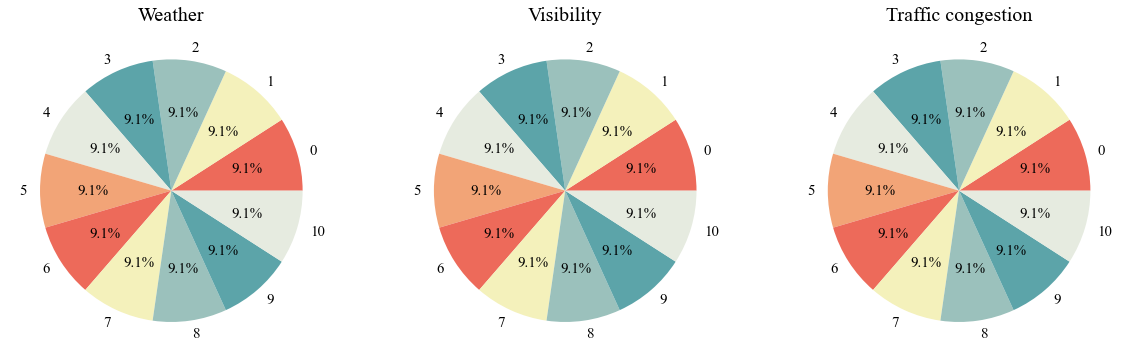

In [71]:
fontdict_title = {'fontsize': 20, 'fontname': 'Times New Roman'}
fontdict_labels = {'fontsize': 15, 'fontname': 'Times New Roman'}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,50))
color_palette = ['#ED6A5A', '#F4F1BB', '#9BC1BC', '#5CA4A9', '#E6EBE0', '#F2A477']
#'#EFC164', '#F3835D', '#F35955', '#286275', '#00434C']

# AX-1
ax1.set_title("Weather", fontdict=fontdict_title)
labels_ = list(cav_data.weather.value_counts().index)
data_ = list(cav_data.weather.value_counts())
ax1.pie(data_, labels=labels_, colors=color_palette[:len(labels_)], 
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-2
ax2.set_title("Visibility", fontdict=fontdict_title)
labels_ = list(cav_data.visibility.value_counts().index)
data_ = list(cav_data.visibility.value_counts())
ax2.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-3
ax3.set_title("Traffic congestion", fontdict=fontdict_title)
labels_ = list(cav_data.traffic_congestion.value_counts().index)
data_ = list(cav_data.traffic_congestion.value_counts())
ax3.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

plt.show()

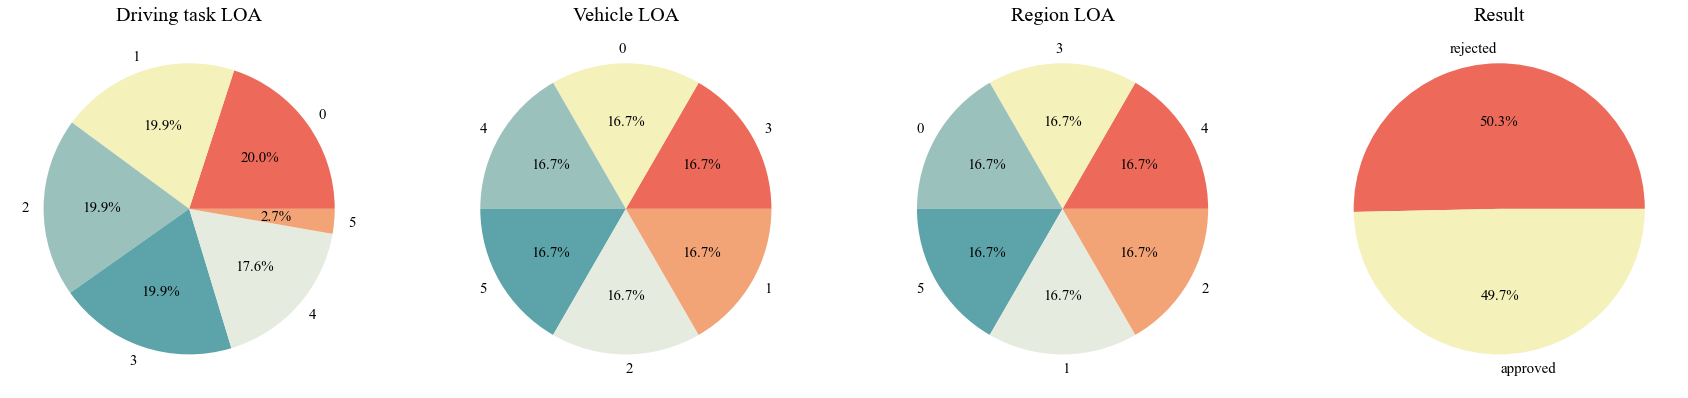

In [70]:
fontdict_title = {'fontsize': 20, 'fontname': 'Times New Roman'}
fontdict_labels = {'fontsize': 15, 'fontname': 'Times New Roman'}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,50))
color_palette = ['#ED6A5A', '#F4F1BB', '#9BC1BC', '#5CA4A9', '#E6EBE0', '#F2A477']
#'#EFC164', '#F3835D', '#F35955', '#286275', '#00434C']

# AX-1
ax1.set_title("Driving task LOA", fontdict=fontdict_title)
labels_ = list(cav_data.driving_task_loa.value_counts().index)
data_ = list(cav_data.driving_task_loa.value_counts())
ax1.pie(data_, labels=labels_, colors=color_palette[:len(labels_)], 
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-2
ax2.set_title("Vehicle LOA", fontdict=fontdict_title)
labels_ = list(cav_data.vehicle_loa.value_counts().index)
data_ = list(cav_data.vehicle_loa.value_counts())
ax2.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-3
ax3.set_title("Region LOA", fontdict=fontdict_title)
labels_ = list(cav_data.region_loa.value_counts().index)
data_ = list(cav_data.region_loa.value_counts())
ax3.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

# AX-4
ax4.set_title("Result", fontdict=fontdict_title)
labels_ = list(cav_data.result.value_counts().index)
data_ = list(cav_data.result.value_counts())
ax4.pie(data_, labels=labels_, colors=color_palette[:len(labels_)],
        autopct='%1.1f%%', textprops=fontdict_labels)

plt.show()

In [76]:
a = pd.crosstab(cav_data.driving_task_loa, cav_data.driving_task_loa)
cramers_corrected_stat(a)

1.0

In [7]:
cav_data.columns

Index(['driving_task_type', 'control', 'monitoring', 'fallback', 'weather',
       'visibility', 'traffic_congestion', 'environmental_weighted_average',
       'driving_task_loa', 'vehicle_loa', 'region_loa', 'result'],
      dtype='object')

In [29]:
a = list(cav_data.columns)
print(a)
print(type(a))
a = a.remove('control') 
print(a)
type(a)

['driving_task_type', 'control', 'monitoring', 'fallback', 'weather', 'visibility', 'traffic_congestion', 'environmental_weighted_average', 'driving_task_loa', 'vehicle_loa', 'region_loa', 'result']
<class 'list'>
None


NoneType

In [17]:
cramers_matrix = []
cav_attr_columns = ['driving_task_type', 'control', 'monitoring', 'fallback', 
                    'weather', 'visibility', 'traffic_congestion', 
                    'driving_task_loa', 'vehicle_loa', 'region_loa']
for x_ in cav_attr_columns:
    row_to_add = []
    for y_ in cav_attr_columns:
        if x_ == y_:
            row_to_add.append(1.0)
        else:
            conff_mx = pd.crosstab(cav_data[x_], cav_data[y_])
            row_to_add.append(cramers_corrected_stat(conff_mx))
    cramers_matrix.append(row_to_add)
print(cramers_matrix)

[[1.0, 0.999995825967906, 0.999993738971459, 0.999993738971459, 0.0, 0.0, 0.0, 0.9963485404532593, 0.0, 0.0], [0.9999958259679058, 1.0, 0.6666617969752607, 0.40823891818689423, 0.0, 0.0, 0.0, 0.9983062799182841, 0.0, 0.0], [0.999993738971459, 0.6666617969752607, 1.0, 0.6123596554685143, 0.0, 0.0, 0.0, 0.9959359935525577, 0.0, 0.0], [0.999993738971459, 0.40823891818689423, 0.6123596554685143, 1.0, 0.0, 0.0, 0.0, 0.9912236879024781, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.09210784602437784, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.11837402230681539, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.03834399398993716, 0.0, 0.0], [0.9963485404532594, 0.998306279918284, 0.9959359935525576, 0.9912236879024781, 0.09210784602437784, 0.11837402230681539, 0.03834399398993716, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]


<AxesSubplot:title={'center':"Cramér's V correlation."}>

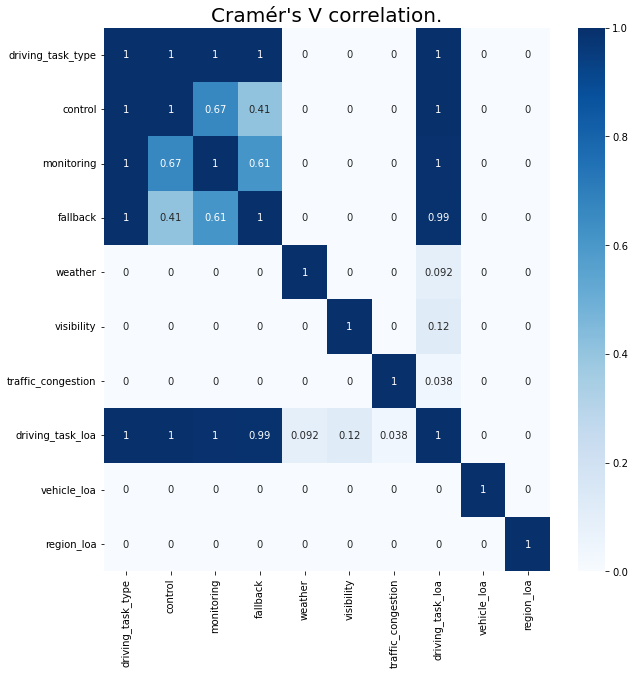

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
fontdict_title = {'fontsize': 20, 'fontname': 'Times New Roman'}
ax.set_title("Cramér's V correlation.", fontdict=fontdict_title)
sns.heatmap(cramers_matrix, xticklabels=cav_attr_columns, 
            yticklabels=cav_attr_columns, cmap="Blues", annot=True)